In [31]:
# Import important libraries
import pandas as pd
import numpy as np

In [32]:
# read dataset
data = pd.read_csv(r"C:\Users\bsrav\INNOMATICS c\INNOMATICS_NOTEBOOK\PROJECT\Online_payment_fraud_detection_using_ml\Online Payments Fraud Detection using Python\PS_20174392719_1491204439457_log.csv")

In [33]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [34]:
# check dataset whether it has null values or not
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [35]:
# Exploring transactions type
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [36]:
type = data["type"].value_counts()
transcations = type.index
quantity = type.values

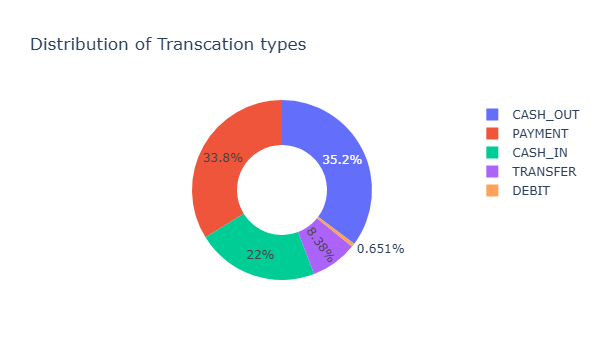

In [37]:
import plotly.express as px
figure = px.pie(data,values = quantity,names= transcations,hole = 0.5,title = "Distribution of Transcation types")
figure.show()

In [38]:
# Check correlation b/w the feature of the data with the isFraud column
# Filter numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation = numeric_data.corr()

# Check correlation with the 'isFraud' column
if "isFraud" in correlation.columns:
    print(correlation["isFraud"].sort_values(ascending=False))
else:
    print("'isFraud' column not found in numeric data.")


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [39]:
data["type"] = data["type"].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
data["isFraud"] = data["isFraud"].map({0:"No Fraud",1:"Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [40]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array (data[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [44]:
# training a machine learning model 
from sklearn.tree import DecisionTreeClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.10,random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.9997406728674666


In [45]:
# prediction
# feature = [type,amount,oldbalanceOrg,newbalanceOrig]
features = np.array([[4,9000.60,9000.60,0.0]])
print(model.predict(features))

['Fraud']


In [48]:
features = np.array([[2,1864.28,21249.0,19384.72]])
print(model.predict(features))

['No Fraud']
